## Import libraries

In [60]:
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.models import Model,load_model
from keras import Input
from keras.layers import concatenate,Dense,Flatten,Dropout
from keras.preprocessing.image import  ImageDataGenerator
import keras.callbacks as kcallbacks
import os
import math
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
from keras.optimizers import SGD
import operator
import numpy as np
from PIL import Image
from collections import defaultdict

## Read the test set

In [61]:
#generate images from train set and validation set
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=128

test_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 385 images belonging to 2 classes.


In [62]:
#generate labels indicating disease (1) or normal (0)
label=validation_generator.class_indices
label={v: k for k, v in label.items()}

In [63]:
print(label)

{0: '0', 1: '1'}


In [64]:
#read images from validation folder
rootdir = './test_224/'
test_laels = []
test_images=[]
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if not (file.endswith(".jpeg"))|(file.endswith(".jpg"))|(file.endswith(".png")):
            continue
        test_laels.append(subdir.split('/')[-1])
        test_images.append(os.path.join(subdir, file))
        
print(test_laels[0],test_images[0])

0 ./test_224/0\1000.png


## Load 5 trained CNN models

In [65]:
 #load model 1: xception
xception_model=load_model('./xception.h5')

In [66]:
 #load model 2: VGG16
vgg_model=load_model('./VGG16.h5')

In [67]:
 #load model 3: VGG19
vgg19_model=load_model('./VGG19.h5')

In [68]:
 #load model 4: inception
incep_model=load_model('./inception.h5')

In [69]:
 #load model 5: inceptionresnet
inres_model=load_model('./inceptionresnet.h5')

## Use the original CNN base models to make predictions

### 1. Xception

1/1 [==============================] - 2s 2s/step
Predicted result for the first image: 0
Confidence level: 0.0020943906


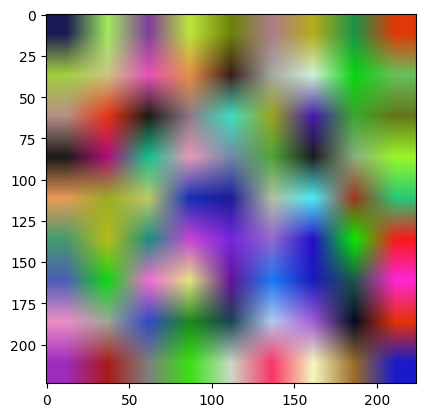

In [70]:
#Single image prediction
import cv2
import matplotlib.pyplot as plt
test=cv2.imread(test_images[0])

img_show=test[:,:,[2,1,0]]
test=test/255.
test_shape=(1,)+test.shape
test=test.reshape(test_shape)

res=xception_model.predict(test)

prob=res[0,np.argmax(res,axis=1)[0]]
res=label[np.argmax(res,axis=1)[0]]
print('Predicted result for the first image: %s'%res)
print('Confidence level: %s'%prob)
plt.imshow(img_show)
plt.show()

In [71]:
%%time
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    inputimg=test_images[i]
    test_batch=[]
    thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
    #print(thisimg)
    test_shape=(1,)+thisimg.shape
    thisimg=thisimg.reshape(test_shape)
    xception_model_batch=xception_model.predict(thisimg) #use master model to process the input image
    #generate result by model 1
    prob=xception_model_batch[0,np.argmax(xception_model_batch,axis=1)[0]]
    res=label[np.argmax(xception_model_batch,axis=1)[0]]
    predict.append(res)
    

1/1 [==============================] - 0s 205ms/step
CPU times: total: 1min 13s
Wall time: 1min 51s


In [72]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
pre=precision_score(test_laels,predict,average='weighted')
re=recall_score(test_laels,predict,average='weighted')
f1=f1_score(test_laels,predict,average='weighted')
print('Xception accuracy: %s'%acc)
print('precision: %s'%pre)
print('recall: %s'%re)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1']
print(classification_report(test_laels, predict, target_names=target_names))

Xception accuracy: 0.9376623376623376
precision: 0.8792106594703997
recall: 0.9376623376623376
f1: 0.9074962570941123
[[361   0]
 [ 24   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       361
           1       0.00      0.00      0.00        24

    accuracy                           0.94       385
   macro avg       0.47      0.50      0.48       385
weighted avg       0.88      0.94      0.91       385



### 2. VGG16

In [73]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    inputimg=test_images[i]
    test_batch=[]
    thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
    #print(thisimg)
    test_shape=(1,)+thisimg.shape
    thisimg=thisimg.reshape(test_shape)
    vgg_model_batch=vgg_model.predict(thisimg) #use master model to process the input image
    #generate result by model 1
    prob=vgg_model_batch[0,np.argmax(vgg_model_batch,axis=1)[0]]
    res=label[np.argmax(vgg_model_batch,axis=1)[0]]
    predict.append(res)
    

1/1 [==============================] - 0s 252ms/step
CPU times: total: 3min 12s
Wall time: 2min 14s


In [74]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
pre=precision_score(test_laels,predict,average='weighted')
re=recall_score(test_laels,predict,average='weighted')
f1=f1_score(test_laels,predict,average='weighted')
print('VGG16 accuracy: %s'%acc)
print('precision: %s'%pre)
print('recall: %s'%re)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1']
print(classification_report(test_laels, predict, target_names=target_names))

VGG16 accuracy: 0.9376623376623376
precision: 0.8792106594703997
recall: 0.9376623376623376
f1: 0.9074962570941123
[[361   0]
 [ 24   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       361
           1       0.00      0.00      0.00        24

    accuracy                           0.94       385
   macro avg       0.47      0.50      0.48       385
weighted avg       0.88      0.94      0.91       385



### 3. VGG19

In [75]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    inputimg=test_images[i]
    test_batch=[]
    thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
    #print(thisimg)
    test_shape=(1,)+thisimg.shape
    thisimg=thisimg.reshape(test_shape)
    vgg19_model_batch=vgg19_model.predict(thisimg) #use master model to process the input image
    #generate result by model 1
    prob=vgg19_model_batch[0,np.argmax(vgg19_model_batch,axis=1)[0]]
    res=label[np.argmax(vgg19_model_batch,axis=1)[0]]
    predict.append(res)
    

1/1 [==============================] - 0s 329ms/step
CPU times: total: 3min 58s
Wall time: 2min 36s


In [76]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
pre=precision_score(test_laels,predict,average='weighted')
re=recall_score(test_laels,predict,average='weighted')
f1=f1_score(test_laels,predict,average='weighted')
print('VGG19 accuracy: %s'%acc)
print('precision: %s'%pre)
print('recall: %s'%re)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1']
print(classification_report(test_laels, predict, target_names=target_names))

VGG19 accuracy: 0.9376623376623376
precision: 0.8792106594703997
recall: 0.9376623376623376
f1: 0.9074962570941123
[[361   0]
 [ 24   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       361
           1       0.00      0.00      0.00        24

    accuracy                           0.94       385
   macro avg       0.47      0.50      0.48       385
weighted avg       0.88      0.94      0.91       385



### 4. Inception

In [77]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    inputimg=test_images[i]
    test_batch=[]
    thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
    #print(thisimg)
    test_shape=(1,)+thisimg.shape
    thisimg=thisimg.reshape(test_shape)
    incep_model_batch=incep_model.predict(thisimg) #use master model to process the input image
    #generate result by model 1
    prob=incep_model_batch[0,np.argmax(incep_model_batch,axis=1)[0]]
    res=label[np.argmax(incep_model_batch,axis=1)[0]]
    predict.append(res)
    

1/1 [==============================] - 0s 141ms/step
CPU times: total: 56.9 s
Wall time: 1min 34s


In [78]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
pre=precision_score(test_laels,predict,average='weighted')
re=recall_score(test_laels,predict,average='weighted')
f1=f1_score(test_laels,predict,average='weighted')
print('inception accuracy: %s'%acc)
print('precision: %s'%pre)
print('recall: %s'%re)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1']
print(classification_report(test_laels, predict, target_names=target_names))

inception accuracy: 0.9376623376623376
precision: 0.8792106594703997
recall: 0.9376623376623376
f1: 0.9074962570941123
[[361   0]
 [ 24   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       361
           1       0.00      0.00      0.00        24

    accuracy                           0.94       385
   macro avg       0.47      0.50      0.48       385
weighted avg       0.88      0.94      0.91       385



### 5. InceptionResnet

In [79]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    inputimg=test_images[i]
    test_batch=[]
    thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
    #print(thisimg)
    test_shape=(1,)+thisimg.shape
    thisimg=thisimg.reshape(test_shape)
    inres_model_batch=inres_model.predict(thisimg) #use master model to process the input image
    #generate result by model 1
    prob=inres_model_batch[0,np.argmax(inres_model_batch,axis=1)[0]]
    res=label[np.argmax(inres_model_batch,axis=1)[0]]
    predict.append(res)
    

1/1 [==============================] - 0s 326ms/step
CPU times: total: 1min 49s
Wall time: 2min 45s


In [80]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
pre=precision_score(test_laels,predict,average='weighted')
re=recall_score(test_laels,predict,average='weighted')
f1=f1_score(test_laels,predict,average='weighted')
print('inceptionresnet accuracy: %s'%acc)
print('precision: %s'%pre)
print('recall: %s'%re)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1']
print(classification_report(test_laels, predict, target_names=target_names))

inceptionresnet accuracy: 0.9376623376623376
precision: 0.8792106594703997
recall: 0.9376623376623376
f1: 0.9074962570941123
[[361   0]
 [ 24   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       361
           1       0.00      0.00      0.00        24

    accuracy                           0.94       385
   macro avg       0.47      0.50      0.48       385
weighted avg       0.88      0.94      0.91       385



### 6. Resnet

In [81]:
 #load model 6: resnet
res_model=load_model('./resnet.h5')

In [82]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    inputimg=test_images[i]
    test_batch=[]
    thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
    #print(thisimg)
    test_shape=(1,)+thisimg.shape
    thisimg=thisimg.reshape(test_shape)
    res_model_batch=res_model.predict(thisimg) #use master model to process the input image
    #generate result by model 1
    prob=res_model_batch[0,np.argmax(res_model_batch,axis=1)[0]]
    res=label[np.argmax(res_model_batch,axis=1)[0]]
    predict.append(res)
    

1/1 [==============================] - 0s 190ms/step
CPU times: total: 1min
Wall time: 1min 49s


In [83]:
%%time
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
pre=precision_score(test_laels,predict,average='weighted')
re=recall_score(test_laels,predict,average='weighted')
f1=f1_score(test_laels,predict,average='weighted')
print('resnet accuracy: %s'%acc)
print('precision: %s'%pre)
print('recall: %s'%re)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1']
print(classification_report(test_laels, predict, target_names=target_names))

resnet accuracy: 0.9376623376623376
precision: 0.8792106594703997
recall: 0.9376623376623376
f1: 0.9074962570941123
[[361   0]
 [ 24   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       361
           1       0.00      0.00      0.00        24

    accuracy                           0.94       385
   macro avg       0.47      0.50      0.48       385
weighted avg       0.88      0.94      0.91       385

CPU times: total: 0 ns
Wall time: 31.3 ms


Best performing single model (vgg):  
Accuracy: 99.96

# Bagging ensemble

In [84]:
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range((length//127)+1):
    inputimg=test_images[127*i:127*(i+1)]
    test_batch=[]
    for path in inputimg:
        thisimg=np.array(Image.open(path))/255
        test_batch.append(thisimg)
    #generate result by model 1
    xception_model_batch=xception_model.predict(np.array(test_batch))
    xception_model_batch=list(np.argmax(xception_model_batch,axis=1))
    xception_model_batch=[label[con] for con in xception_model_batch]
#     print(xception_model_batch)
    #generate result by model 2
    vgg_model_batch=vgg_model.predict(np.array(test_batch))
    vgg_model_batch=list(np.argmax(vgg_model_batch,axis=1))
    vgg_model_batch=[label[con] for con in vgg_model_batch]
#     print(vgg_model_batch)
    #generate result by model 3
    vgg19_model_batch=vgg19_model.predict(np.array(test_batch))
    vgg19_model_batch=list(np.argmax(vgg19_model_batch,axis=1))
    vgg19_model_batch=[label[con] for con in vgg19_model_batch]
#     print(vgg19_model_batch)
    #generate result by model 4
    incep_model_batch=incep_model.predict(np.array(test_batch))
    incep_model_batch=list(np.argmax(incep_model_batch,axis=1))
    incep_model_batch=[label[con] for con in incep_model_batch]
#     print(incep_model_batch)
    #generate result by model 5
    inres_model_batch=inres_model.predict(np.array(test_batch))
    inres_model_batch=list(np.argmax(inres_model_batch,axis=1))
    inres_model_batch=[label[con] for con in inres_model_batch]
#     print(inres_model_batch)
    #bagging the three results generated by 3 singular models
    predict_batch=[]
    for i,j,k,p,q in zip(xception_model_batch,vgg_model_batch,vgg19_model_batch,incep_model_batch,inres_model_batch):
        count=defaultdict(int)
        count[i]+=1
        count[j]+=1
        count[k]+=1
        count[p]+=1
        count[q]+=1
        #rank the predicted results in descending order
        predict_one=sorted(count.items(), key=operator.itemgetter(1),reverse=True)[0][0]
        predict_batch.append(predict_one)
#     print('predict:',predict_batch)
    predict.append(predict_batch)
t2 = time.time()
print('The testing time is :%f seconds' % (t2-t1))

1/1 [==============================] - 1s 561ms/step
The testing time is :229.680403 seconds


In [85]:
predict=sum(predict,[])

In [86]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
print('bagging accuracy:%s'%acc)

bagging accuracy:0.9376623376623376


In [87]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1']
print(classification_report(test_laels, predict, target_names=target_names))

[[361   0]
 [ 24   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       361
           1       0.00      0.00      0.00        24

    accuracy                           0.94       385
   macro avg       0.47      0.50      0.48       385
weighted avg       0.88      0.94      0.91       385



After bagging ensemble, the accuracy improved to 0.990

# Probability Averaging

In [88]:
import keras
from keras.models import Model, load_model
from keras import Input
from keras.layers import concatenate, Dense, Flatten, Dropout, Average
from keras.preprocessing.image import ImageDataGenerator
import keras.callbacks as kcallbacks
import os
import math
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
from keras.optimizers import SGD
import operator
import numpy as np
from PIL import Image
from collections import defaultdict
import tensorflow as tf
import os

# Suppress TensorFlow warnings
tf.get_logger().setLevel('ERROR')

# Set CUDA visible devices
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Your additional code here


In [89]:
import time
t1 = time.time()
img=Input(shape=(224,224,3),name='img')
feature1=xception_model(img)
feature2=vgg_model(img)
feature3=incep_model(img)
for layer in xception_model.layers:  
    layer.trainable = False 
for layer in vgg_model.layers:  
    layer.trainable = False  
for layer in incep_model.layers:  
    layer.trainable = False  
output=Average()([feature1,feature2,feature3]) #add the confidence lists generated by 3 models
model=Model(inputs=img,outputs=output)

#the optimization function
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
t2 = time.time()
print('The testing time is :%f seconds' % (t2-t1))

The testing time is :2.387500 seconds


In [90]:
#read images from validation folder
rootdir = './test_224/'
test_laels = []
test_images=[]
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if not (file.endswith(".jpeg"))|(file.endswith(".jpg"))|(file.endswith(".png")):
            continue
        test_laels.append(subdir.split('/')[-1])
        test_images.append(os.path.join(subdir, file))
        
print(test_laels[0],test_images[0])

0 ./test_224/0\1000.png


In [91]:
#test the averaging model on the validation set
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range((length//127)+1):
    inputimg=test_images[127*i:127*(i+1)]
    test_batch=[]
    for path in inputimg:
        thisimg=np.array(Image.open(path))/255
        test_batch.append(thisimg)
    #print(i, np.array(test_batch).shape)
    model_batch=model.predict(np.array(test_batch))
    predict_batch=list(np.argmax(model_batch,axis=1))
    predict_batch=[label[con] for con in predict_batch]
    predict.append(predict_batch)

predict=sum(predict,[])

t2 = time.time()
print('The testing time is :%f seconds' % (t2-t1))

1/1 [==============================] - 1s 1s/step
The testing time is :105.433748 seconds


In [92]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(test_laels,predict)
print('Probability Averaging accuracy:%s'%acc)

Probability Averaging accuracy:0.9376623376623376


In [93]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1']
print(classification_report(test_laels, predict, target_names=target_names))

[[361   0]
 [ 24   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       361
           1       0.00      0.00      0.00        24

    accuracy                           0.94       385
   macro avg       0.47      0.50      0.48       385
weighted avg       0.88      0.94      0.91       385



# Concatenation

In [94]:
import keras
from keras.models import Model,load_model
from keras import Input
from keras.layers import concatenate,Dense,Flatten,Dropout
from keras.preprocessing.image import  ImageDataGenerator
import keras.callbacks as kcallbacks
import os
import math
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
from keras.optimizers import SGD

In [95]:
for i,layer in enumerate(xception_model.layers):
    print(i,layer.name)

0 input_1
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_7
13 block2_pool
14 batch_normalization
15 add
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_8
23 block3_pool
24 batch_normalization_1
25 add_1
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_9
33 block4_pool
34 batch_normalization_2
35 add_2
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_3
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_sepconv3_a

In [96]:
for i,layer in enumerate(vgg_model.layers):
    print(i,layer.name)

0 input_2
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 global_average_pooling2d_2
20 dense_4
21 dropout_2
22 dense_5


In [97]:
for i,layer in enumerate(vgg19_model.layers):
    print(i,layer.name)

0 input_3
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_conv4
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_conv4
16 block4_pool
17 block5_conv1
18 block5_conv2
19 block5_conv3
20 block5_conv4
21 block5_pool
22 global_average_pooling2d_3
23 dense_6
24 dropout_3
25 dense_7


In [98]:
for i,layer in enumerate(incep_model.layers):
    print(i,layer.name)

0 input_5
1 conv2d_11
2 batch_normalization_4
3 activation
4 conv2d_12
5 batch_normalization_5
6 activation_1
7 conv2d_13
8 batch_normalization_6
9 activation_2
10 max_pooling2d_2
11 conv2d_14
12 batch_normalization_7
13 activation_3
14 conv2d_15
15 batch_normalization_8
16 activation_4
17 max_pooling2d_3
18 conv2d_19
19 batch_normalization_12
20 activation_8
21 conv2d_17
22 conv2d_20
23 batch_normalization_10
24 batch_normalization_13
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_16
29 conv2d_18
30 conv2d_21
31 conv2d_22
32 batch_normalization_9
33 batch_normalization_11
34 batch_normalization_14
35 batch_normalization_15
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_26
42 batch_normalization_19
43 activation_15
44 conv2d_24
45 conv2d_27
46 batch_normalization_17
47 batch_normalization_20
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_23
52 conv2d_25
53 conv2d_28
54 conv2d_29
55 batch_normalization_16
56 batc

In [99]:
for i,layer in enumerate(inres_model.layers):
    print(i,layer.name)

0 input_6
1 conv2d_105
2 batch_normalization_98
3 activation_94
4 conv2d_106
5 batch_normalization_99
6 activation_95
7 conv2d_107
8 batch_normalization_100
9 activation_96
10 max_pooling2d_6
11 conv2d_108
12 batch_normalization_101
13 activation_97
14 conv2d_109
15 batch_normalization_102
16 activation_98
17 max_pooling2d_7
18 conv2d_113
19 batch_normalization_106
20 activation_102
21 conv2d_111
22 conv2d_114
23 batch_normalization_104
24 batch_normalization_107
25 activation_100
26 activation_103
27 average_pooling2d_9
28 conv2d_110
29 conv2d_112
30 conv2d_115
31 conv2d_116
32 batch_normalization_103
33 batch_normalization_105
34 batch_normalization_108
35 batch_normalization_109
36 activation_99
37 activation_101
38 activation_104
39 activation_105
40 mixed_5b
41 conv2d_120
42 batch_normalization_113
43 activation_109
44 conv2d_118
45 conv2d_121
46 batch_normalization_111
47 batch_normalization_114
48 activation_107
49 activation_110
50 conv2d_117
51 conv2d_119
52 conv2d_122
53 batc

### Construct the ensemble model using the last "dense layer" of each base CNN model

In [100]:
model1=Model(inputs=[xception_model.layers[0].get_input_at(0)],outputs=xception_model.get_layer('dense_3').output,name='xception')
model2=Model(inputs=[vgg_model.layers[0].get_input_at(0)],outputs=vgg_model.get_layer('dense_5').output,name='vgg')
model3=Model(inputs=[vgg19_model.layers[0].get_input_at(0)],outputs=vgg19_model.get_layer('dense_7').output,name='vgg19')
model4=Model(inputs=[incep_model.layers[0].get_input_at(0)],outputs=incep_model.get_layer('dense_11').output,name='incep')
model5=Model(inputs=[inres_model.layers[0].get_input_at(0)],outputs=inres_model.get_layer('dense_13').output,name='inres')

In [101]:
#plot the figures
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # acc
            plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
            # loss
            plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [102]:
ensemble_history= LossHistory()

In [103]:
#generate training and test images
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=128	#could try 128 or 32

#Normalization
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './train_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='binary')

Found 385 images belonging to 2 classes.
Found 385 images belonging to 2 classes.


In [104]:
def lr_decay(epoch):
    lrs = [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0001,0.00001,0.000001,
           0.000001,0.000001,0.000001,0.000001,0.0000001,0.0000001,0.0000001,0.0000001,0.0000001,0.0000001]
    return lrs[epoch]

In [105]:
auto_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=0, mode='auto', epsilon=0.0001, cooldown=0, min_lr=0)
my_lr = LearningRateScheduler(lr_decay)

In [106]:
def ensemble(num_class,epochs,savepath='./ensemble.h5'):
    img=Input(shape=(224,224,3),name='img')
    feature1=model1(img)
    feature2=model2(img)
    feature3=model3(img)
    x=concatenate([feature1,feature2,feature3])
    x=Dropout(0.5)(x)
    x=Dense(64,activation='relu')(x)
    x=Dropout(0.25)(x)
    output=Dense(1,activation='sigmoid',name='output')(x)
    model=Model(inputs=img,outputs=output)
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    #train model
    earlyStopping=kcallbacks.EarlyStopping(monitor='val_acc',patience=2, verbose=1, mode='auto')
    saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_acc', verbose=1, save_best_only=False, mode='auto')
    hist=model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[earlyStopping,saveBestModel,ensemble_history,auto_lr],
    )

In [107]:
ensemble_model=ensemble(num_class=2,epochs=10)

Epoch 1/10
4/4 [==============================] - ETA: 0s - loss: 0.6923 - accuracy: 0.8987  
Epoch 1: saving model to .\ensemble.h5
4/4 [==============================] - 366s 118s/step - loss: 0.6923 - accuracy: 0.8987 - val_loss: 0.6868 - val_accuracy: 0.9506 - lr: 0.0010
Epoch 2/10
4/4 [==============================] - ETA: 0s - loss: 0.6833 - accuracy: 0.9766 
Epoch 2: saving model to .\ensemble.h5
4/4 [==============================] - 336s 93s/step - loss: 0.6833 - accuracy: 0.9766 - val_loss: 0.6783 - val_accuracy: 0.9429 - lr: 0.0010
Epoch 3/10
4/4 [==============================] - ETA: 0s - loss: 0.6736 - accuracy: 0.9766 
Epoch 3: saving model to .\ensemble.h5
4/4 [==============================] - 336s 93s/step - loss: 0.6736 - accuracy: 0.9766 - val_loss: 0.6694 - val_accuracy: 0.9455 - lr: 0.0010
Epoch 4/10
4/4 [==============================] - ETA: 0s - loss: 0.6641 - accuracy: 0.9818 
Epoch 4: saving model to .\ensemble.h5
4/4 [==============================] - 336s 

In [108]:
ensemble_model=load_model('./ensemble.h5')

In [109]:
#read images from validation folder
rootdir = './test_224/'
test_laels = []
test_images=[]
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if not (file.endswith(".jpeg"))|(file.endswith(".jpg"))|(file.endswith(".png")):
            continue
        test_laels.append(subdir.split('/')[-1])
        test_images.append(os.path.join(subdir, file))
        
print(test_laels[0],test_images[0])

0 ./test_224/0\1000.png


In [110]:
#test the averaging model on the validation set
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range((length//127)+1):
    inputimg=test_images[127*i:127*(i+1)]
    test_batch=[]
    for path in inputimg:
        thisimg=np.array(Image.open(path))/255
        test_batch.append(thisimg)
    #print(i, np.array(test_batch).shape)
    ensemble_model_batch=ensemble_model.predict(np.array(test_batch))
    predict_batch=list(np.argmax(ensemble_model_batch,axis=1))
    predict_batch=[label[con] for con in predict_batch]
    predict.append(predict_batch)

predict=sum(predict,[])

t2 = time.time()
print('The testing time is :%f seconds' % (t2-t1))

1/1 [==============================] - 2s 2s/step
The testing time is :171.806491 seconds


In [111]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
print('Concatenation accuracy:%s'%acc)

Concatenation accuracy:0.9376623376623376


In [112]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1']
print(classification_report(test_laels, predict, target_names=target_names))

[[361   0]
 [ 24   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       361
           1       0.00      0.00      0.00        24

    accuracy                           0.94       385
   macro avg       0.47      0.50      0.48       385
weighted avg       0.88      0.94      0.91       385

